                                                                                       #### Project 1

Examine real life data from Philadelphia Bike Share program.
In this case, the data is located in the data.csv file.
Each file contains comprehensive ride information from a
three-month period. You only need to analyze one of them.

1) Select data file to work with. Download it, open it
in Excel, and familiarize yourself with its contents.

2) Figure out how to import the data into Python/Jupyter.
You can use the csv library or the pandas library.

3) Determine and plot the probability mass function of
average number of rides per day. What are the expected
value and variance?

4) Determine and plot the conditional probability mass
function of the average number of rides at night (defined
as 6PM-6AM). What are the expected value and variance?

5) Determine and plot the probability mass function of the
average number of rides as a function of hour (0-23).
What are the expected value and variance.

6) Compute the correlation (*not covariance*) between time
of day (hour and minute) and number of rides.

7) Limiting yourself to rides taken between 4:30 and 6:30PM
on weekdays, how well does a Poisson process model the rate
at which bikes are checked out.

## Step 1

In [229]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.metrics import confusion_matrix
from sklearn.mixture import GaussianMixture as GMM
import pandas
import re
import statistics
from scipy.stats import poisson

In [230]:
print("Importing the data for the 2021 Q2")
dataFrame = pandas.read_csv('data.csv')

Importing the data for the 2021 Q2


/var/folders/q4/sq902pw91nbgxz6d4gj0qbcc0000gn/T/ipykernel_1269/735858484.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  dataFrame = pandas.read_csv('data.csv')


## Step 2

In [231]:
startTime = dataFrame["start_time"].to_numpy()
print("Testing how I can index through the data and get the information that I need. ")
print(startTime[0:5])
print(startTime[380:400])

print("\nDetermine how many elements there are to see if they match the number of rows "
      "of the excel sheet: ", startTime.size)
print("Number of elements and rows match")

#for i in range(0,startTime.size):
#     startTime[i] = parser.parse(startTime[i])

print("\nTesting how I can get the information that I need from each element: ")
startTime[0][0:6] # I can use this to get dates


Testing how I can index through the data and get the information that I need. 
['4/1/21 0:44' '4/1/21 1:49' '4/1/21 2:25' '4/1/21 6:19' '4/1/21 6:33']
['4/1/21 13:34' '4/1/21 13:35' '4/1/21 13:36' '4/1/21 13:36'
 '4/1/21 13:36' '4/1/21 13:37' '4/1/21 13:37' '4/1/21 13:37'
 '4/1/21 13:37' '4/1/21 13:38' '4/1/21 13:38' '4/1/21 13:39'
 '4/1/21 13:39' '4/1/21 13:40' '4/1/21 13:43' '4/1/21 13:43'
 '4/1/21 13:44' '4/1/21 13:44' '4/1/21 13:44' '4/1/21 13:44']

Determine how many elements there are to see if they match the number of rows of the excel sheet:  232195
Number of elements and rows match

Testing how I can get the information that I need from each element: 


'4/1/21'

## Step 3

In [232]:
# This for loop will give me a new array with only month and day values
dayStartTime = []
for i in range(0,len(startTime)):
     if startTime[i][3] == "/":
          dayStartTime.append(startTime[i][0:3])
     else:
          dayStartTime.append(startTime[i][0:4])

# print(len(dayStartTime)) # Checking that we went through every element
# print(dayStartTime[0:10]) # Testing that I am getting some elements that make sense

dayStartTime = np.array(dayStartTime) # to numpy array

# print(np.unique(dayStartTime)) # Getting all of the unique dates

In [233]:
#get unique values and counts of each value
unique, counts = np.unique(dayStartTime, return_counts=True)

#display unique values and counts side by side
print("Displaying the unique values and their corresponding counts side by side: \n")
print(np.asarray((unique, counts)).T)

Displaying the unique values and their corresponding counts side by side: 

[['4/1' '1294']
 ['4/10' '3279']
 ['4/11' '1177']
 ['4/12' '1483']
 ['4/13' '2135']
 ['4/14' '1736']
 ['4/15' '2009']
 ['4/16' '1919']
 ['4/17' '2526']
 ['4/18' '2672']
 ['4/19' '2114']
 ['4/2' '1399']
 ['4/20' '2556']
 ['4/21' '1652']
 ['4/22' '1021']
 ['4/23' '1634']
 ['4/24' '2810']
 ['4/25' '1986']
 ['4/26' '2151']
 ['4/27' '2545']
 ['4/28' '2788']
 ['4/29' '1958']
 ['4/3' '1942']
 ['4/30' '2296']
 ['4/4' '2051']
 ['4/5' '2092']
 ['4/6' '2405']
 ['4/7' '2183']
 ['4/8' '2470']
 ['4/9' '2142']
 ['5/1' '2780']
 ['5/10' '2365']
 ['5/11' '2493']
 ['5/12' '2894']
 ['5/13' '3141']
 ['5/14' '3338']
 ['5/15' '3822']
 ['5/16' '3110']
 ['5/17' '2974']
 ['5/18' '3223']
 ['5/19' '3048']
 ['5/2' '3062']
 ['5/20' '3129']
 ['5/21' '3582']
 ['5/22' '3523']
 ['5/23' '2844']
 ['5/24' '2666']
 ['5/25' '3059']
 ['5/26' '2467']
 ['5/27' '3390']
 ['5/28' '1897']
 ['5/29' '946']
 ['5/3' '1760']
 ['5/30' '909']
 ['5/31' '3030']
 ['

In [234]:
print("Re-organizing the data so the days are in order: ")
daysApril = [unique[0]] + [unique[11]] + [unique[22]] + [list(unique[24:30])][0] +\
     [list(unique[1:11])][0] + [list(unique[12:22])][0] + [unique[23]]
daysMay = [unique[30]] + [unique[41]] + [unique[52]] + [list(unique[55:61])][0] +\
     [list(unique[31:41])][0] + [list(unique[42:52])][0] + [list(unique[53:55])][0]
daysJune = [unique[61]] + [unique[72]] + [unique[83]] + [list(unique[85:91])][0] +\
     [list(unique[62:72])][0] + [list(unique[73:83])][0] + [unique[84]]

orderedDays = daysApril + daysMay + daysJune
print(orderedDays)

Re-organizing the data so the days are in order: 
['4/1', '4/2', '4/3', '4/4', '4/5', '4/6', '4/7', '4/8', '4/9', '4/10', '4/11', '4/12', '4/13', '4/14', '4/15', '4/16', '4/17', '4/18', '4/19', '4/20', '4/21', '4/22', '4/23', '4/24', '4/25', '4/26', '4/27', '4/28', '4/29', '4/30', '5/1', '5/2', '5/3', '5/4', '5/5', '5/6', '5/7', '5/8', '5/9', '5/10', '5/11', '5/12', '5/13', '5/14', '5/15', '5/16', '5/17', '5/18', '5/19', '5/20', '5/21', '5/22', '5/23', '5/24', '5/25', '5/26', '5/27', '5/28', '5/29', '5/30', '5/31', '6/1', '6/2', '6/3', '6/4', '6/5', '6/6', '6/7', '6/8', '6/9', '6/10', '6/11', '6/12', '6/13', '6/14', '6/15', '6/16', '6/17', '6/18', '6/19', '6/20', '6/21', '6/22', '6/23', '6/24', '6/25', '6/26', '6/27', '6/28', '6/29', '6/30']


In [235]:
print("Re-organizing the counts as well: ")
countApril = [counts[0]] + [counts[11]] + [counts[22]] + [list(counts[24:30])][0] +\
     [list(counts[1:11])][0] + [list(counts[12:22])][0] + [counts[23]]
countMay = [counts[30]] + [counts[41]] + [counts[52]] + [list(counts[55:61])][0] +\
     [list(counts[31:41])][0] + [list(counts[42:52])][0] + [list(counts[53:55])][0]
countJune = [counts[61]] + [counts[72]] + [counts[83]] + [list(counts[85:91])][0] +\
     [list(counts[62:72])][0] + [list(counts[73:83])][0] + [counts[84]]

orderedCounts = countMay + countJune + countApril
print(orderedCounts)

Re-organizing the counts as well: 
[2780, 3062, 1760, 2823, 1878, 2808, 2408, 2168, 1626, 2365, 2493, 2894, 3141, 3338, 3822, 3110, 2974, 3223, 3048, 3129, 3582, 3523, 2844, 2666, 3059, 2467, 3390, 1897, 946, 909, 3030, 2834, 3008, 2076, 2643, 3119, 2605, 2724, 2073, 2715, 3100, 2157, 3500, 3079, 2803, 3104, 3262, 3398, 3471, 2708, 2985, 2534, 2142, 3391, 3462, 3680, 3216, 2752, 2783, 2697, 2586, 1294, 1399, 1942, 2051, 2092, 2405, 2183, 2470, 2142, 3279, 1177, 1483, 2135, 1736, 2009, 1919, 2526, 2672, 2114, 2556, 1652, 1021, 1634, 2810, 1986, 2151, 2545, 2788, 1958, 2296]


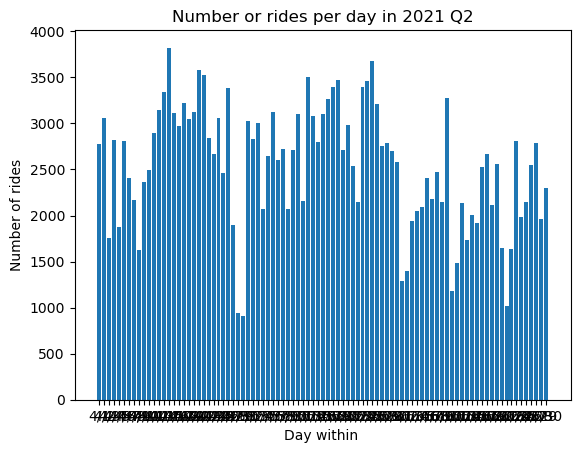

In [236]:
plt.bar(orderedDays, orderedCounts)
plt.xlabel('Day within ')
plt.ylabel('Number of rides')
plt.title('Number or rides per day in 2021 Q2')
plt.show()

In [237]:
print("Number of rides to probability based on total number of rides: \n")
totalRides = np.sum(counts)
dayProb = orderedCounts/totalRides
print(dayProb)

Number of rides to probability based on total number of rides: 

[0.0119727  0.01318719 0.00757984 0.01215788 0.00808803 0.01209328
 0.01037059 0.00933698 0.00700273 0.0101854  0.01073667 0.01246366
 0.01352742 0.01437585 0.0164603  0.01339391 0.0128082  0.01388057
 0.0131269  0.01347574 0.01542669 0.01517259 0.01224833 0.01148173
 0.01317427 0.01062469 0.0145998  0.00816986 0.00407416 0.00391481
 0.01304938 0.01220526 0.01295463 0.00894076 0.01138267 0.01343268
 0.01121902 0.01173152 0.00892784 0.01169276 0.01335085 0.00928961
 0.01507354 0.01326041 0.01207175 0.01336807 0.01404854 0.01463425
 0.01494864 0.01166261 0.01285557 0.01091324 0.009225   0.0146041
 0.01490988 0.01584875 0.01385043 0.01185211 0.01198562 0.01161524
 0.01113719 0.0055729  0.00602511 0.00836366 0.00883309 0.00900967
 0.01035767 0.00940158 0.01063761 0.009225   0.01412175 0.00506902
 0.00638687 0.00919486 0.00747647 0.00865221 0.00826461 0.01087879
 0.01150757 0.00910442 0.01100799 0.00711471 0.00439717 0.0070371

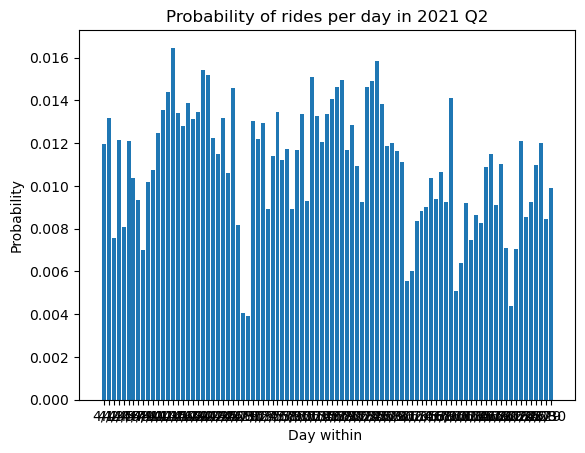

In [238]:
plt.bar(orderedDays, dayProb)
plt.xlabel('Day within ')
plt.ylabel('Probability')
plt.title('Probability of rides per day in 2021 Q2')
plt.show()

In [239]:
ridesPerDay = ["0-1000", "1001-2000", "2001-3000", "3001-4000"]
countRidesPerDay = [0, 0, 0, 0]

for i in orderedCounts:
    if i <= 1000:
        countRidesPerDay[0] += 1
    elif i > 1000 and i <= 2000:
        countRidesPerDay[1] += 1
    elif i > 2000 and i <= 3000:
        countRidesPerDay[2] += 1
    else:
        countRidesPerDay[3] += 1

print(countRidesPerDay)
pmfRidesPerDay = []
for i in range(0,len(countRidesPerDay)): pmfRidesPerDay.append(countRidesPerDay[i]/len(orderedCounts))
print(pmfRidesPerDay)

[2, 16, 46, 27]
[0.02197802197802198, 0.17582417582417584, 0.5054945054945055, 0.2967032967032967]


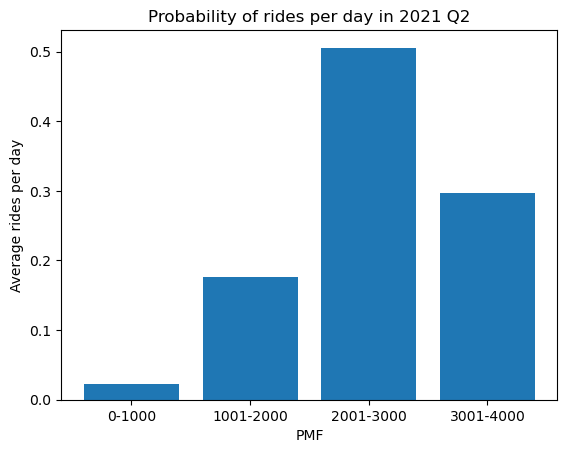

In [240]:
plt.bar(ridesPerDay, pmfRidesPerDay)
plt.xlabel('PMF')
plt.ylabel('Average rides per day')
plt.title('Probability of rides per day in 2021 Q2')
plt.show()

In [241]:
def expected_value(values, weights):
    values = np.asarray(values)
    weights = np.asarray(weights)
    return (values * weights).sum() / weights.sum()

In [242]:
print("Expected value is: " + str(int(expected_value(orderedCounts,dayProb))) + " rides")
print("The variance is: " + str(statistics.variance(orderedCounts)))

Expected value is: 2720 rides
The variance is: 435052


## Step 4

In [243]:
# This for loop will give me a new array with only rides at night
ridesNight = []
for i in range(0,len(startTime)):
     if startTime[i][-5] == " " and int(startTime[i][-4]) < 6:
         ridesNight.append(startTime[i][-4:-3])
     elif startTime[i][-5] != " " and int(startTime[i][-5:-3]) > 17:
         ridesNight.append(startTime[i][-5:-3])


#print(ridesNight[1100:1200]) # Testing that I am getting some elements that make sense
#print(len(ridesNight))

nightTime = np.array(ridesNight) # to numpy array

print("Displaying the unique values and how they are ordered: \n")
print(np.unique(nightTime)) # Getting all of the unique hours

Displaying the unique values and how they are ordered: 

['0' '1' '18' '19' '2' '20' '21' '22' '23' '3' '4' '5']


In [244]:
#get unique values and counts of each value
unique, counts = np.unique(nightTime, return_counts=True)

#display unique values and counts side by side
print("Displaying the unique values and their corresponding counts side by side: \n")
print(np.asarray((unique, counts)).T)

Displaying the unique values and their corresponding counts side by side: 

[['0' '2974']
 ['1' '1730']
 ['18' '19827']
 ['19' '16515']
 ['2' '1156']
 ['20' '11781']
 ['21' '7985']
 ['22' '6515']
 ['23' '4826']
 ['3' '575']
 ['4' '677']
 ['5' '1927']]


In [245]:
print("Re-organizing the data so the hours are in order: \n")
orderedHours = [list(unique[0:2])][0] + [unique[4]] + [list(unique[9:])][0] +\
               [list(unique[2:4])][0] + [list(unique[5:9])][0]
orderedHours = orderedHours[6:] + orderedHours[0:6]
print(orderedHours)

Re-organizing the data so the hours are in order: 

['18', '19', '20', '21', '22', '23', '0', '1', '2', '3', '4', '5']


In [246]:
print("Re-organizing the data so the night counts are in order: \n")
orderedNightCounts = [list(counts[0:2])][0] + [counts[4]] + [list(counts[9:])][0] +\
               [list(counts[2:4])][0] + [list(counts[5:9])][0]
orderedNightCounts = orderedNightCounts[6:] + orderedNightCounts[0:6]
print(orderedNightCounts)

Re-organizing the data so the night counts are in order: 

[19827, 16515, 11781, 7985, 6515, 4826, 2974, 1730, 1156, 575, 677, 1927]


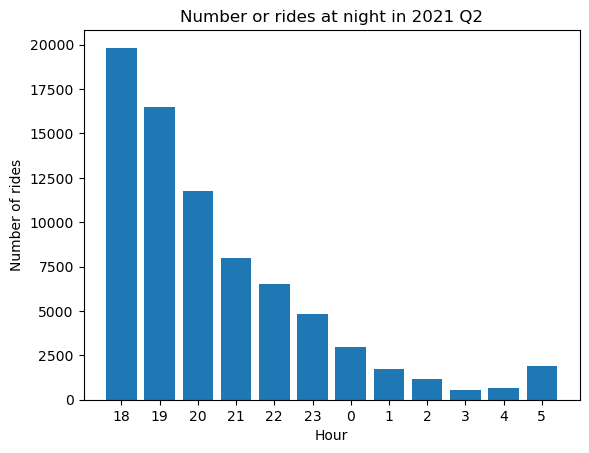

In [247]:
plt.bar(orderedHours, orderedNightCounts)
plt.xlabel('Hour')
plt.ylabel('Number of rides')
plt.title('Number or rides at night in 2021 Q2')
plt.show()

In [248]:
print("Number of rides to probability based on total number of rides: \n")
totalRides = np.sum(counts)
nightProb = orderedNightCounts/totalRides
print(nightProb)

Number of rides to probability based on total number of rides: 

[0.25921713 0.21591622 0.15402416 0.10439546 0.08517676 0.06309486
 0.03888192 0.02261793 0.01511348 0.00751752 0.00885106 0.02519349]


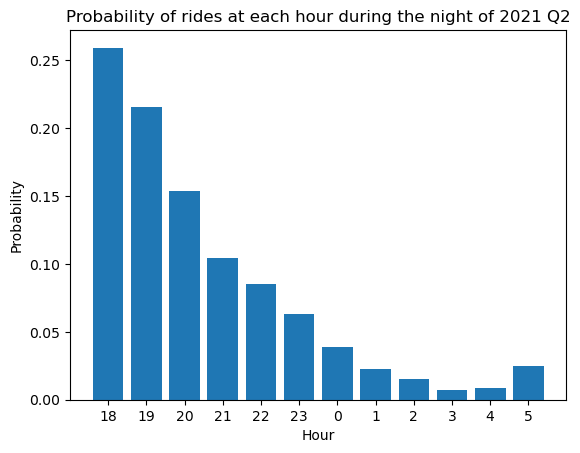

In [249]:
plt.bar(orderedHours, nightProb)
plt.xlabel('Hour')
plt.ylabel('Probability')
plt.title('Probability of rides at each hour during the night of 2021 Q2')
plt.show()

In [250]:
nightCMF = []
for i in range(0,len(nightProb)):
    if i != 0:
        nightCMF.append(nightProb[i]+nightCMF[i-1])
    else:
        nightCMF.append(nightProb[i])
print("Trying to sum the probabilities for the CMF: \n")
print(nightCMF)

Trying to sum the probabilities for the CMF: 

[0.2592171320991528, 0.4751333542516473, 0.6291575149042987, 0.7335529756301642, 0.818729735383328, 0.881824599937245, 0.920706516054806, 0.9433244430498903, 0.9584379249032529, 0.9659554439912144, 0.9748065055956491, 1.0]


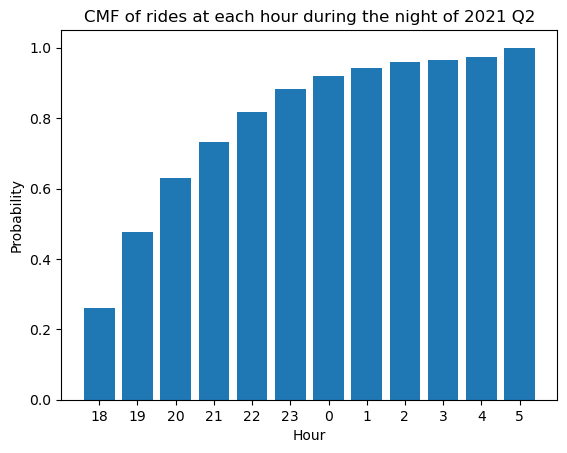

In [251]:
plt.bar(orderedHours, nightCMF)
plt.xlabel('Hour')
plt.ylabel('Probability')
plt.title('CMF of rides at each hour during the night of 2021 Q2')
plt.show()

In [252]:
print("Expected value is: " + str(int(expected_value(orderedNightCounts,nightProb))) +
      " rides")
print("The variance is: " + str(statistics.variance(orderedNightCounts)))

Expected value is: 12444 rides
The variance is: 42207684


## Step 5

In [253]:
ridesPerHour = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
hoursList = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9",
             "10", "11", "12", "13", "14", "15", "16", "17",
             "18", "19", "20", "21", "22", "23"]


# This for loop will give me a new array with only rides at night
for i in range(0,len(startTime)):
    if startTime[i][-5] == " " and int(startTime[i][-4]) == 0:
        ridesPerHour[0] += 1
    elif startTime[i][-5] == " " and int(startTime[i][-4]) == 1:
        ridesPerHour[1] += 1
    elif startTime[i][-5] == " " and int(startTime[i][-4]) == 2:
        ridesPerHour[2] += 1
    elif startTime[i][-5] == " " and int(startTime[i][-4]) == 3:
        ridesPerHour[3] += 1
    elif startTime[i][-5] == " " and int(startTime[i][-4]) == 4:
        ridesPerHour[4] += 1
    elif startTime[i][-5] == " " and int(startTime[i][-4]) == 5:
        ridesPerHour[5] += 1
    elif startTime[i][-5] == " " and int(startTime[i][-4]) == 6:
        ridesPerHour[6] += 1
    elif startTime[i][-5] == " " and int(startTime[i][-4]) == 7:
        ridesPerHour[7] += 1
    elif startTime[i][-5] == " " and int(startTime[i][-4]) == 8:
        ridesPerHour[8] += 1
    elif startTime[i][-5] == " " and int(startTime[i][-4]) == 9:
        ridesPerHour[9] += 1
    elif startTime[i][-5] != " " and int(startTime[i][-5:-3]) == 10:
        ridesPerHour[10] += 1
    elif startTime[i][-5] != " " and int(startTime[i][-5:-3]) == 11:
        ridesPerHour[11] += 1
    elif startTime[i][-5] != " " and int(startTime[i][-5:-3]) == 12:
        ridesPerHour[12] += 1
    elif startTime[i][-5] != " " and int(startTime[i][-5:-3]) == 13:
        ridesPerHour[13] += 1
    elif startTime[i][-5] != " " and int(startTime[i][-5:-3]) == 14:
        ridesPerHour[14] += 1
    elif startTime[i][-5] != " " and int(startTime[i][-5:-3]) == 15:
        ridesPerHour[15] += 1
    elif startTime[i][-5] != " " and int(startTime[i][-5:-3]) == 16:
        ridesPerHour[16] += 1
    elif startTime[i][-5] != " " and int(startTime[i][-5:-3]) == 17:
        ridesPerHour[17] += 1
    elif startTime[i][-5] != " " and int(startTime[i][-5:-3]) == 18:
        ridesPerHour[18] += 1
    elif startTime[i][-5] != " " and int(startTime[i][-5:-3]) == 19:
        ridesPerHour[19] += 1
    elif startTime[i][-5] != " " and int(startTime[i][-5:-3]) == 20:
        ridesPerHour[20] += 1
    elif startTime[i][-5] != " " and int(startTime[i][-5:-3]) == 21:
        ridesPerHour[21] += 1
    elif startTime[i][-5] != " " and int(startTime[i][-5:-3]) == 22:
        ridesPerHour[22] += 1
    elif startTime[i][-5] != " " and int(startTime[i][-5:-3]) == 23:
        ridesPerHour[23] += 1

print(ridesPerHour)
print(len(ridesPerHour))
print(len(hoursList))

[2974, 1730, 1156, 575, 677, 1927, 5190, 7816, 9916, 9089, 9928, 11879, 14302, 15064, 15508, 16734, 18470, 21811, 19827, 16515, 11781, 7985, 6515, 4826]
24
24


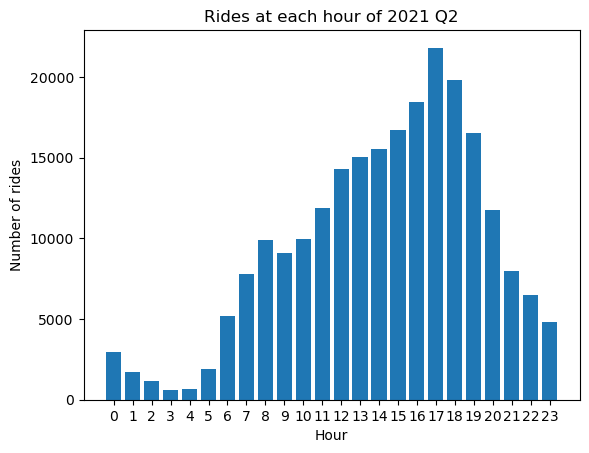

In [254]:
plt.bar(hoursList, ridesPerHour)
plt.xlabel('Hour')
plt.ylabel('Number of rides')
plt.title('Rides at each hour of 2021 Q2')
plt.show()

In [255]:
pmfRidesPerHour = []
for i in range(0,len(ridesPerHour)): pmfRidesPerHour.append(ridesPerHour[i]/sum(ridesPerHour))

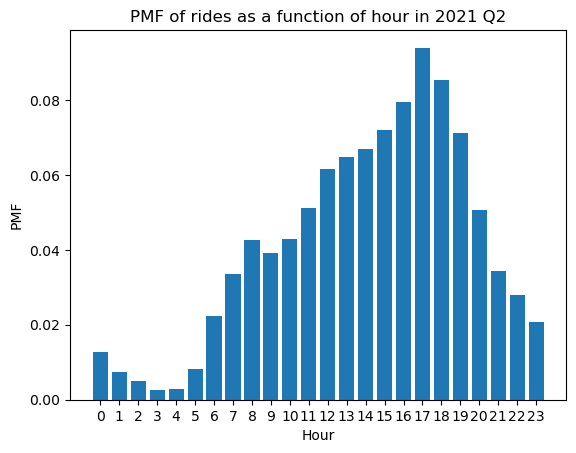

In [256]:
plt.bar(hoursList, pmfRidesPerHour)
plt.xlabel('Hour')
plt.ylabel('PMF')
plt.title('PMF of rides as a function of hour in 2021 Q2')
plt.show()

## Step 6

In [257]:
# Compute the correlation between time of day (hour and minute) and number of rides

timeDay = []
# This for loop will give me a new array with only rides at night
for i in range(0,len(startTime)):
     if startTime[i][-5] == " ":
         timeDay.append(startTime[i][-4:])
     elif startTime[i][-5] != " ":
         timeDay.append(startTime[i][-5:])


#print(timeDay[110:1200]) # Testing that I am getting some elements that make sense
#print(len(timeDay))

hourMin = np.array(timeDay) # to numpy array

#print("Displaying the unique values and how they are ordered: \n")
#print(np.unique(hourMin)) # Getting all of the unique hours and min
#print(len(np.unique(hourMin)))

In [258]:
#get unique values and counts of each value
unique, counts = np.unique(hourMin, return_counts=True)

#display unique values and counts side by side
print("Displaying the unique values and their corresponding counts side by side: \n")
print(np.asarray((unique, counts)).T)
xy = np.asarray((unique,counts)).T

x = []
y = []

for i in xy:
    x.append(i[0])
    y.append(int(i[1]))

#print(x)
#print(y)
actualTime = []
for i in x:
    if i[1] == ":":
        hour = int(i[0])
        minute = int(i[2:])
        minute = float("{:.2f}".format(minute/60))
        actualTime.append(hour+minute)
    else:
        hour = int(i[0:2])
        minute = int(i[3:])
        minute = float("{:.2f}".format(minute/60))
        actualTime.append(hour+minute)

#print(actualTime)

print('\nCorr(Hour and Minutes, Number of rides) = ' , f"{ np.corrcoef(actualTime,y)[0,1] :0.3f}" )

Displaying the unique values and their corresponding counts side by side: 

[['0:00' '52']
 ['0:01' '48']
 ['0:02' '39']
 ...
 ['9:57' '140']
 ['9:58' '170']
 ['9:59' '127']]

Corr(Hour and Minutes, Number of rides) =  0.604


## Step 7

In [259]:
weekdays = []
aprilWeekDays = [1, 2, 5, 6, 7, 8, 9, 12, 13, 14, 15, 16,
                 19, 20, 21, 22, 23, 26, 27, 28, 29, 30]

mayWeekdays = [3, 4, 5, 6, 7, 10, 11, 12, 13, 14, 17,
               18, 19, 20, 21, 24, 25, 26, 27, 28, 31]

juneWeekdays = [1, 2, 3, 4, 7, 8, 9, 10, 11, 14, 15,
                16, 17, 18, 21, 22, 23, 24, 25, 28, 29, 30]

for i in startTime:
    if i[0] == "4":
        if i[3] == "/":
            if int(i[2]) in aprilWeekDays:
                weekdays.append(i)
        elif i[4] == "/":
            if int(i[2:4]) in aprilWeekDays:
                weekdays.append(i)
    elif i[0] == "5":
        if i[3] == "/":
            if int(i[2]) in mayWeekdays:
                weekdays.append(i)
        elif i[4] == "/":
            if int(i[2:4]) in mayWeekdays:
                weekdays.append(i)
    elif i[0] == "6":
        if i[3] == "/":
            if int(i[2]) in juneWeekdays:
                weekdays.append(i)
        elif i[4] == "/":
            if int(i[2:4]) in juneWeekdays:
                weekdays.append(i)

#print(len(weekdays))

In [260]:
fourToSix = []
for i in weekdays:
    if i[-5] != " ":
        hour = int(i[-5:-3])
        minute = int(i[-2:])
        minute = float("{:.2f}".format(minute/60))
        if hour == 17:
            #fourToSix.append(i)
            fourToSix.append(i[-5:])
        elif hour == 16:
            if minute >= 0.5:
                fourToSix.append(i[-5:])
        elif hour == 18:
            if minute <= 0.5:
                fourToSix.append(i[-5:])

#print(fourToSix)

In [261]:
hourMin = np.array(fourToSix) # to numpy array

#get unique values and counts of each value
unique, counts = np.unique(hourMin, return_counts=True)

#display unique values and counts side by side
print("Displaying the unique values and their corresponding counts side by side: \n")
#print(np.asarray((unique, counts)).T)
ab = np.asarray((unique,counts)).T
print(ab[100:200])

a = []
b = []

for i in ab:
    a.append(i[0])
    b.append(int(i[1]))

Displaying the unique values and their corresponding counts side by side: 

[['18:10' '275']
 ['18:11' '257']
 ['18:12' '287']
 ['18:13' '288']
 ['18:14' '283']
 ['18:15' '294']
 ['18:16' '284']
 ['18:17' '244']
 ['18:18' '262']
 ['18:19' '266']
 ['18:20' '269']
 ['18:21' '251']
 ['18:22' '249']
 ['18:23' '258']
 ['18:24' '270']
 ['18:25' '262']
 ['18:26' '248']
 ['18:27' '237']
 ['18:28' '260']
 ['18:29' '238']
 ['18:30' '235']]


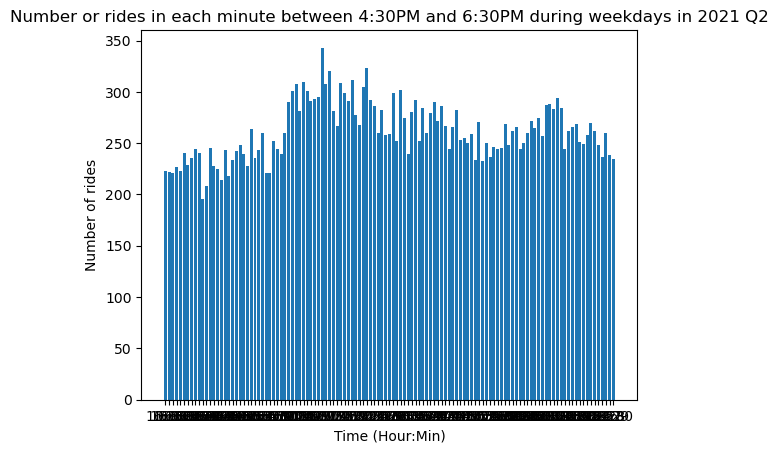

In [262]:
# bar chart of data
plt.bar(a, b)
plt.xlabel('Time (Hour:Min)')
plt.ylabel('Number of rides')
plt.title('Number or rides in each minute between 4:30PM and 6:30PM during weekdays in 2021 Q2')
plt.show()

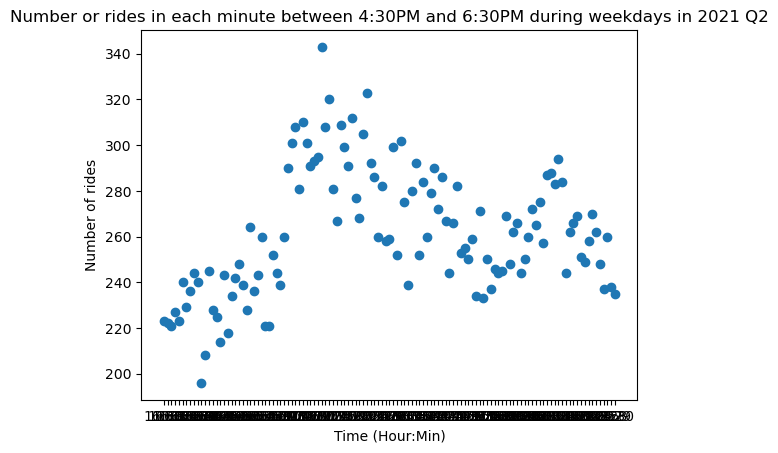

In [263]:
plt.scatter(a, b)
plt.xlabel('Time (Hour:Min)')
plt.ylabel('Number of rides')
plt.title('Number or rides in each minute between 4:30PM and 6:30PM during weekdays in 2021 Q2')
plt.show()

In [264]:
#7) Limiting yourself to rides taken between 4:30 and 6:30PM / 16:30 and 18:30 /
#on weekdays, how well does a Poisson process model the rate
#at which bikes are checked out.

rateChange = []

for i in range(0,len(b)):
    if i != len(b)-1:
        rateChange.append(abs(int(b[i+1])-int(b[i])))
        #rateChange.append(int(b[i+1])-int(b[i]))
    else:
        rateChange.append(abs(b[-1]-b[-2]))
        #rateChange.append(int(b[-1])-int(b[-2]))
#print(b)
#print(rateChange)

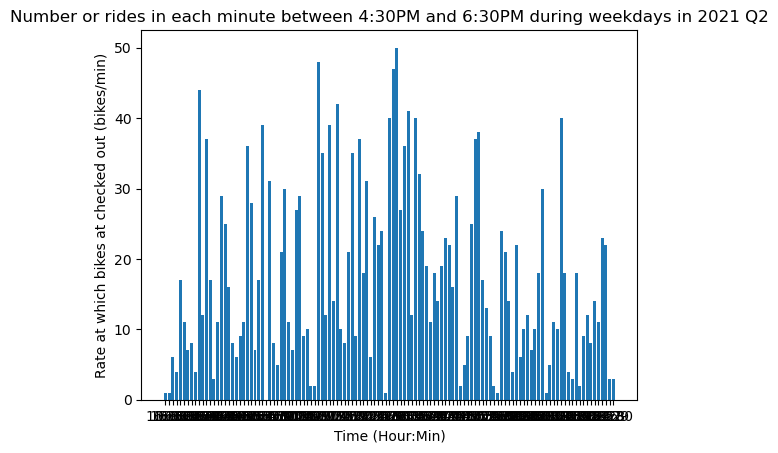

In [265]:
plt.bar(a, rateChange)
plt.xlabel('Time (Hour:Min)')
plt.ylabel('Rate at which bikes at checked out (bikes/min)')
plt.title('Number or rides in each minute between 4:30PM and 6:30PM during weekdays in 2021 Q2')
plt.show()

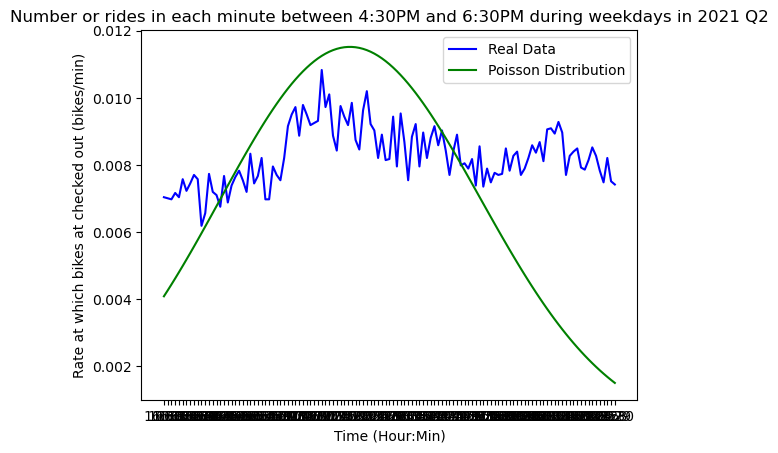

In [266]:
d = []
for i in b:
    d.append(i/sum(b))
x = np.arange(0, 121, 1)
# poisson distribution data for y-axis
y = poisson.pmf(x, mu = 1200, loc = -1150)


plt.plot(a,d,c="blue", label="Real Data")
plt.plot(a, y, c = "green", label = "Poisson Distribution")
plt.legend(loc='upper right')
plt.xlabel('Time (Hour:Min)')
plt.ylabel('Rate at which bikes at checked out (bikes/min)')
plt.title('Number or rides in each minute between 4:30PM and 6:30PM during weekdays in 2021 Q2')
plt.show()